In [1]:
import numpy as np
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import pymysql
from sqlalchemy import create_engine, text

warnings.filterwarnings('ignore')
plt.rcParams['font.family'] = 'Gulim'
plt.rcParams['font.size'] = 12
plt.rcParams['figure.dpi'] = 100

In [2]:
protocol ="mysql+pymysql://"
user = "root"
password = "reaver813"
host = "localhost"
port = "3306"
db = "mini1"
con_str = f"{protocol}{user}:{password}@{host}:{port}/{db}" 
conn = create_engine(con_str)

In [3]:
# 년도별 전국총합 산업분류별 전력 판매량과 변화량 비교

In [4]:
# DB에서 데이터 가져오기
all_city = pd.read_sql("SELECT * FROM elec",conn)

In [5]:
# 산업분류별로 나누기
all_sbyy_hm = pd.DataFrame(all_city.groupby('연도').sum().주거용)
all_sbyy_ofc = pd.DataFrame(all_city.groupby('연도').sum().업무용)

In [6]:
# 변화량 구하기
cl = ['hm','ofc']
change = [ ]
for i in cl:
    try:
        for j in range(globals()['all_sbyy_'+i].shape[0]):
            change.append(round(((globals()['all_sbyy_'+i].iloc[j+1,0] - globals()['all_sbyy_'+i].iloc[j,0]) / globals()['all_sbyy_'+i].iloc[j,0] * 100),2))
    except:
        globals()['all_'+i+'_change'] = pd.DataFrame(change)
        globals()['all_'+i+'_change'].index=(['2015-2016','2016-2017','2017-2018','2018-2019','2019-2020','2020-2021','2021-2022'])
        globals()['all_'+i+'_change'].columns=(['변화량'])
        change = [ ]

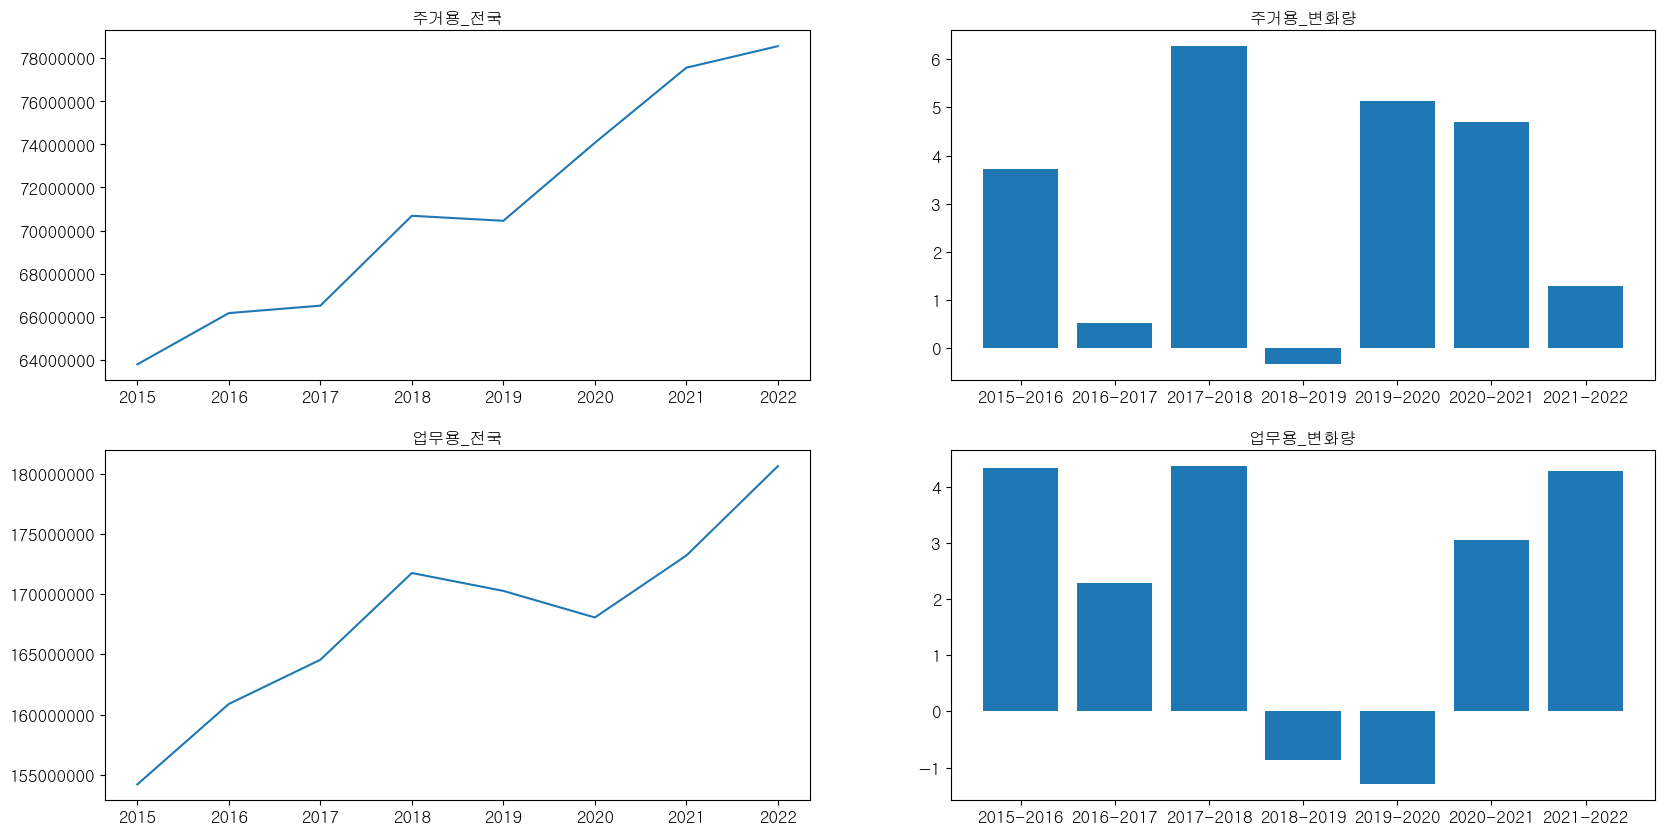

In [7]:
# 시각화 하기
fig, ax = plt.subplots(2,2,figsize = (20,10))
ax[0,0].plot(all_sbyy_hm.index,all_sbyy_hm.주거용)
ax[0,0].set_title('주거용_전국',fontsize=12)
ax[0,0].get_yaxis().get_major_formatter().set_scientific(False)
ax[0,1].bar(all_hm_change.index,all_hm_change.변화량)
ax[0,1].set_title('주거용_변화량',fontsize=12)
ax[0,1].get_yaxis().get_major_formatter().set_scientific(False)
ax[1,0].plot(all_sbyy_ofc.index,all_sbyy_ofc.업무용)
ax[1,0].set_title('업무용_전국',fontsize=12)
ax[1,0].get_yaxis().get_major_formatter().set_scientific(False)
ax[1,1].bar(all_ofc_change.index,all_ofc_change.변화량)
ax[1,1].set_title('업무용_변화량',fontsize=12)
ax[1,1].get_yaxis().get_major_formatter().set_scientific(False)

In [8]:
# 년도별 월별(전국총합) 산업분류별 전력 판매량 비교

In [9]:
by_month_sum = pd.read_sql("SELECT * FROM by_month_sum",conn)

Text(0.5, 1.0, '월별 업무용 전력 판매량')

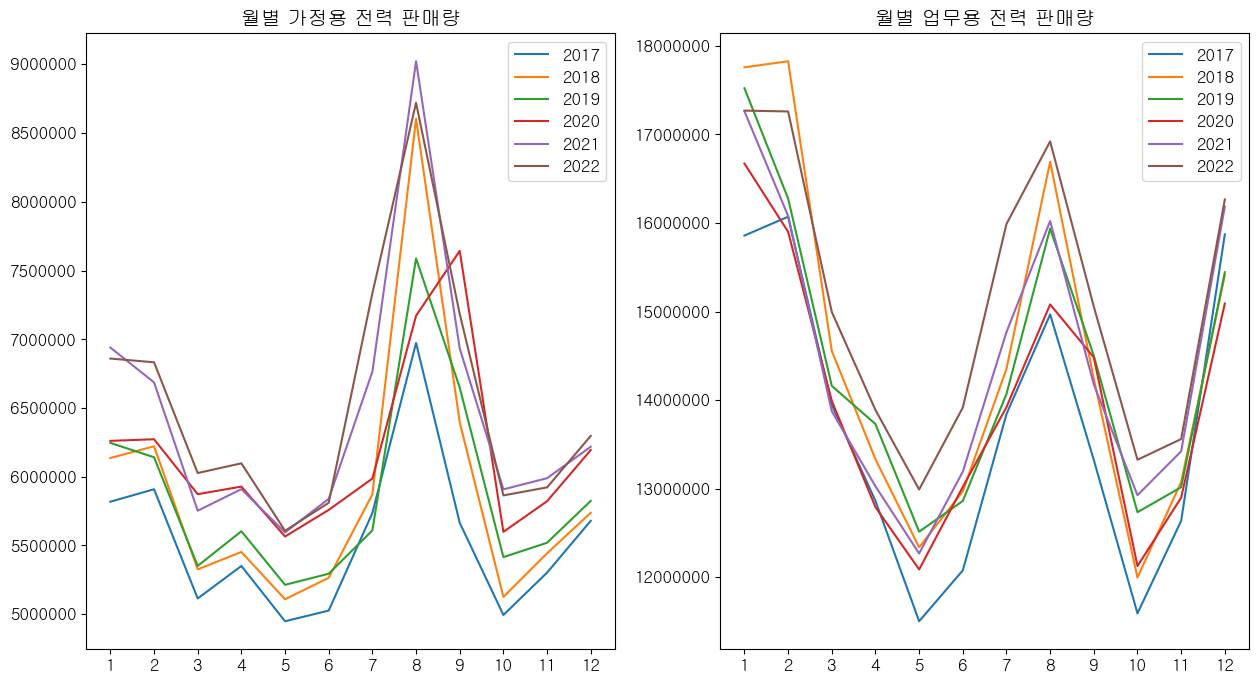

In [10]:
# 시각화 하기
year = ['2017','2018','2019','2020','2021','2022']
fig, ax = plt.subplots(1,2,figsize=(15,8))
for i in year:
    ax[0].plot(by_month_sum.loc[by_month_sum['연도'] == i].월,by_month_sum.loc[by_month_sum['연도'] == i].주거용,label = i)
    ax[1].plot(by_month_sum.loc[by_month_sum['연도'] == i].월,by_month_sum.loc[by_month_sum['연도'] == i].업무용,label = i)
for j in range(2):
    ax[j].get_yaxis().get_major_formatter().set_scientific(False)
    ax[j].legend()
ax[0].set_title('월별 가정용 전력 판매량')
ax[1].set_title('월별 업무용 전력 판매량')

In [11]:
# 광역시별 산업분류별 전력 판매량 분포 

In [12]:
cities = ['su','bs','dg','ic','gj','dj','us','jj','sj']
local_id = ['11','21','22','23','24','25','26','39','29']
kor_cities = ['서울','부산','대구','인천','광주','대전','울산','제주','세종']
for i,j in zip(cities,local_id):
    globals()[i] = pd.read_sql('SELECT * FROM elec WHERE local_id ='+j,conn)

In [13]:
for i in cities:
    globals()[i+'_sum'] = pd.DataFrame(globals()[i].iloc[:,-3:].sum())

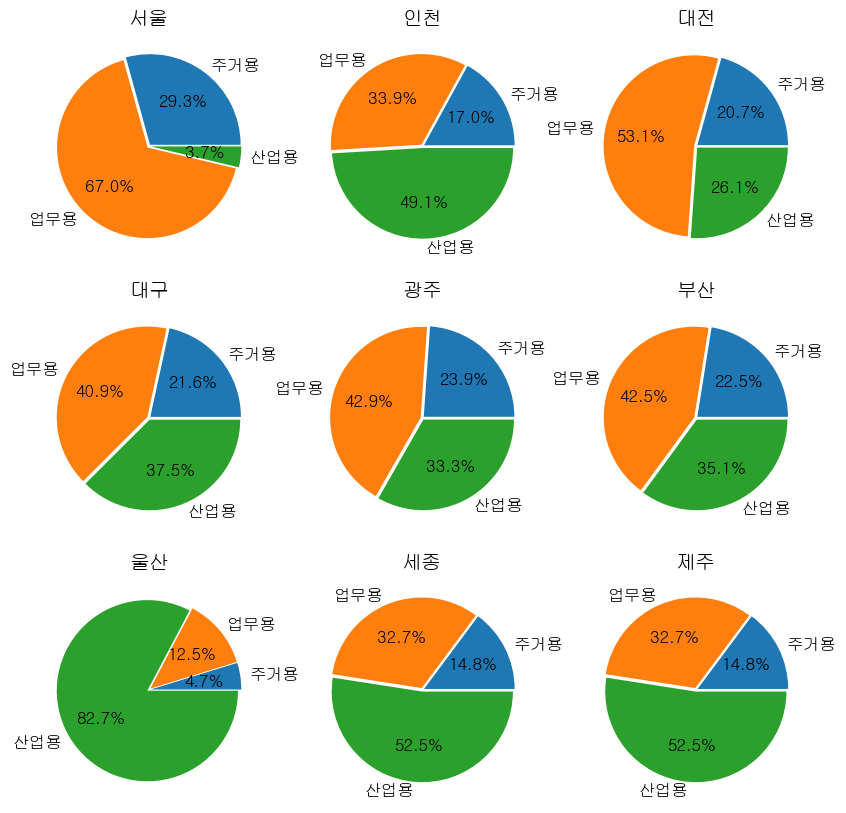

In [14]:
fig, ax = plt.subplots(3,3,figsize=(10,10))
explode = [0.02,0.02,0.02]
ax[0,0].pie(su_sum[0],labels = su_sum.index,autopct='%.1f%%',explode=explode)
ax[0,0].set_title('서울')
ax[0,1].pie(ic_sum[0],labels = ic_sum.index,autopct='%.1f%%',explode=explode)
ax[0,1].set_title('인천')
ax[0,2].pie(dj_sum[0],labels = dj_sum.index,autopct='%.1f%%',explode=explode)
ax[0,2].set_title('대전')
ax[1,0].pie(dg_sum[0],labels = dg_sum.index,autopct='%.1f%%',explode=explode)
ax[1,0].set_title('대구')
ax[1,1].pie(gj_sum[0],labels = gj_sum.index,autopct='%.1f%%',explode=explode)
ax[1,1].set_title('광주')
ax[1,2].pie(bs_sum[0],labels = bs_sum.index,autopct='%.1f%%',explode=explode)
ax[1,2].set_title('부산')
ax[2,0].pie(us_sum[0],labels = us_sum.index,autopct='%.1f%%',explode=explode)
ax[2,0].set_title('울산')
ax[2,1].pie(sj_sum[0],labels = sj_sum.index,autopct='%.1f%%',explode=explode)
ax[2,1].set_title('세종')
ax[2,2].pie(sj_sum[0],labels = jj_sum.index,autopct='%.1f%%',explode=explode)
ax[2,2].set_title('제주')
fig.show()

In [15]:
# 거리두기 상황의 광역시별 전력 판매량 변화

In [16]:
distance = pd.read_sql('SELECT * FROM distance',conn)
month = pd.read_sql('SELECT * FROM month',conn)

In [17]:
# 거리두기 상황의 기간만 가져오기
month['월'] = month['월'].astype('int')
tmp_month = month.loc[month['연도'] == '2020']
tmp_month2 = month.loc[(month['연도'] == '2021') & (month['월'] <= 10)]
month = pd.concat([tmp_month,tmp_month2])

In [18]:
# 시각화를 위한 정제
distance.연도 = distance.연도.astype('str')
distance.월 = distance.월.astype('str')
distance['YM'] = distance['연도']+"-"+distance['월']
month.연도 = month.연도.astype('str')
month.월 = month.월.astype('str')
month['YM'] = month['연도']+"-"+month['월']

In [19]:
# 변화량 구하기
change = [ ]
for i,j in zip(cities,local_id):
    try:
        for k in range(month.loc[month.local_id == int(j)].주거용.iloc[1:].shape[0]):
            change.append(round(((list(month.loc[month.local_id == int(j)].주거용.iloc[1:])[k+1] - list(month.loc[month.local_id == int(j)].주거용.iloc[1:])[k]) / list(month.loc[month.local_id == int(j)].주거용.iloc[1:])[k] * 100),2))
    except:
        globals()[i+'_month_hm_change'] = pd.DataFrame(change)
        globals()[i+'_month_hm_change'].index=(['20-02~03','20-03~04','20-04~05','20-05~06','20-06~07','20-07~08','20-08~09','20-09~10','20-10~11','20-11~12','20-12~21-01','21-01~02','21-02~03','21-03~04','21-04~05','21-05~06','21-06~07','21-07~08','21-08~09','21-09~10'])
        globals()[i+'_month_hm_change'].columns=(['변화량'])
        change = [ ]
for i,j in zip(cities,local_id):
    try:
        for k in range(month.loc[month.local_id == int(j)].업무용.iloc[1:].shape[0]):
            change.append(round(((list(month.loc[month.local_id == int(j)].업무용.iloc[1:])[k+1] - list(month.loc[month.local_id == int(j)].업무용.iloc[1:])[k]) / list(month.loc[month.local_id == int(j)].업무용.iloc[1:])[k] * 100),2))
    except:
        globals()[i+'_month_ofc_change'] = pd.DataFrame(change)
        globals()[i+'_month_ofc_change'].index=(['20-02~03','20-03~04','20-04~05','20-05~06','20-06~07','20-07~08','20-08~09','20-09~10','20-10~11','20-11~12','20-12~21-01','21-01~02','21-02~03','21-03~04','21-04~05','21-05~06','21-06~07','21-07~08','21-08~09','21-09~10'])
        globals()[i+'_month_ofc_change'].columns=(['변화량'])
        change = [ ]
for i,j in zip(cities,local_id):
    try:
        for k in range(month.loc[month.local_id == int(j)].산업용.iloc[1:].shape[0]):
            change.append(round(((list(month.loc[month.local_id == int(j)].산업용.iloc[1:])[k+1] - list(month.loc[month.local_id == int(j)].산업용.iloc[1:])[k]) / list(month.loc[month.local_id == int(j)].산업용.iloc[1:])[k] * 100),2))
    except:
        globals()[i+'_month_ind_change'] = pd.DataFrame(change)
        globals()[i+'_month_ind_change'].index=(['20-02~03','20-03~04','20-04~05','20-05~06','20-06~07','20-07~08','20-08~09','20-09~10','20-10~11','20-11~12','20-12~21-01','21-01~02','21-02~03','21-03~04','21-04~05','21-05~06','21-06~07','21-07~08','21-08~09','21-09~10'])
        globals()[i+'_month_ind_change'].columns=(['변화량'])
        change = [ ]
# 시각화 용도로 임시 인덱스 부여
for i in cities:
    globals()[i+'_month_hm_change'].reset_index(inplace=True)
    globals()[i+'_month_ind_change'].reset_index(inplace=True)

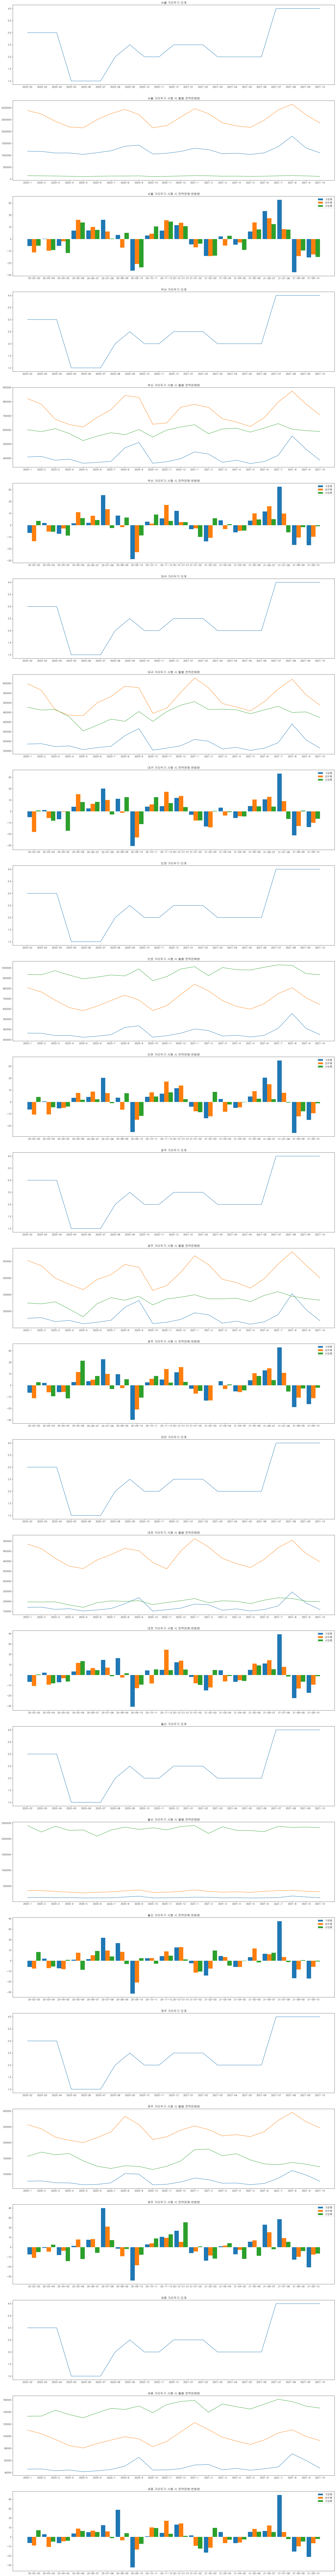

In [20]:
graph_num = [[0,1,2],[3,4,5],[6,7,8],[9,10,11],[12,13,14],[15,16,17],[18,19,20],[21,22,23],[24,25,26]]
fig, ax = plt.subplots(27,1,figsize=(28,225))
for i,j,k,l in zip(cities,kor_cities,graph_num,local_id):
    ax[k[0]].plot(distance.loc[distance.local_id == int(l)].YM,distance.loc[distance.local_id == int(l)].단계)
    ax[k[0]].set_title(j+' 거리두기 단계')
    ax[k[1]].plot(month.loc[month.local_id == int(l)].YM,month.loc[month.local_id == int(l)].주거용)
    ax[k[1]].plot(month.loc[month.local_id == int(l)].YM,month.loc[month.local_id == int(l)].업무용)
    ax[k[1]].plot(month.loc[month.local_id == int(l)].YM,month.loc[month.local_id == int(l)].산업용)
    ax[k[1]].set_title(j+' 거리두기 시행 시 월별 전력판매량')
    ax[k[1]].get_yaxis().get_major_formatter().set_scientific(False)
    ax[k[2]].bar(globals()[i+'_month_hm_change'].index-0.3,globals()[i+'_month_hm_change'].변화량,width=0.3,label='가정용')
    ax[k[2]].bar(globals()[i+'_month_ofc_change'].index,globals()[i+'_month_ofc_change'].변화량,width=0.3,label='업무용')
    ax[k[2]].bar(globals()[i+'_month_ind_change'].index+0.3,globals()[i+'_month_ind_change'].변화량,width=0.3,label='산업용')
    ax[k[2]].set_title(j+' 거리두기 시행 시 전력판매 변화량')
    ax[k[2]].legend()

In [21]:
# 시간대 별 자료 분석
by_time = pd.read_sql('SELECT * FROM by_time',conn)

In [22]:
year = ['2016','2017','2018','2019','2020','2021']
for i in year:
    globals()['time'+i] = by_time.loc[by_time.연도 == i]

In [23]:
# 시간대 별 변화량 분석
change = [ ]
for i in year:
    try:
        for j in range(globals()['time'+i].shape[0]):
            change.append(round(((globals()['time'+i].iloc[j+1,3] - globals()['time'+i].iloc[j,3]) / globals()['time'+i].iloc[j,3] * 100),2))
    except:
        globals()['time'+i+'_change'] = pd.DataFrame(change)
        globals()['time'+i+'_change'].index=(['01-02','02-03','03-04','04-05','05-06','06-07','07-08','08-09','09-10','10-11','11-12','12-13','13-14','14-15','15-16','16-17','17-18','18-19','19-20','20-21','21-22','22-23','23-00'])
        globals()['time'+i+'_change'].columns=(['변화량'])
        change = [ ]
for i in year:
    globals()['time'+i+'_change'].reset_index(inplace=True)

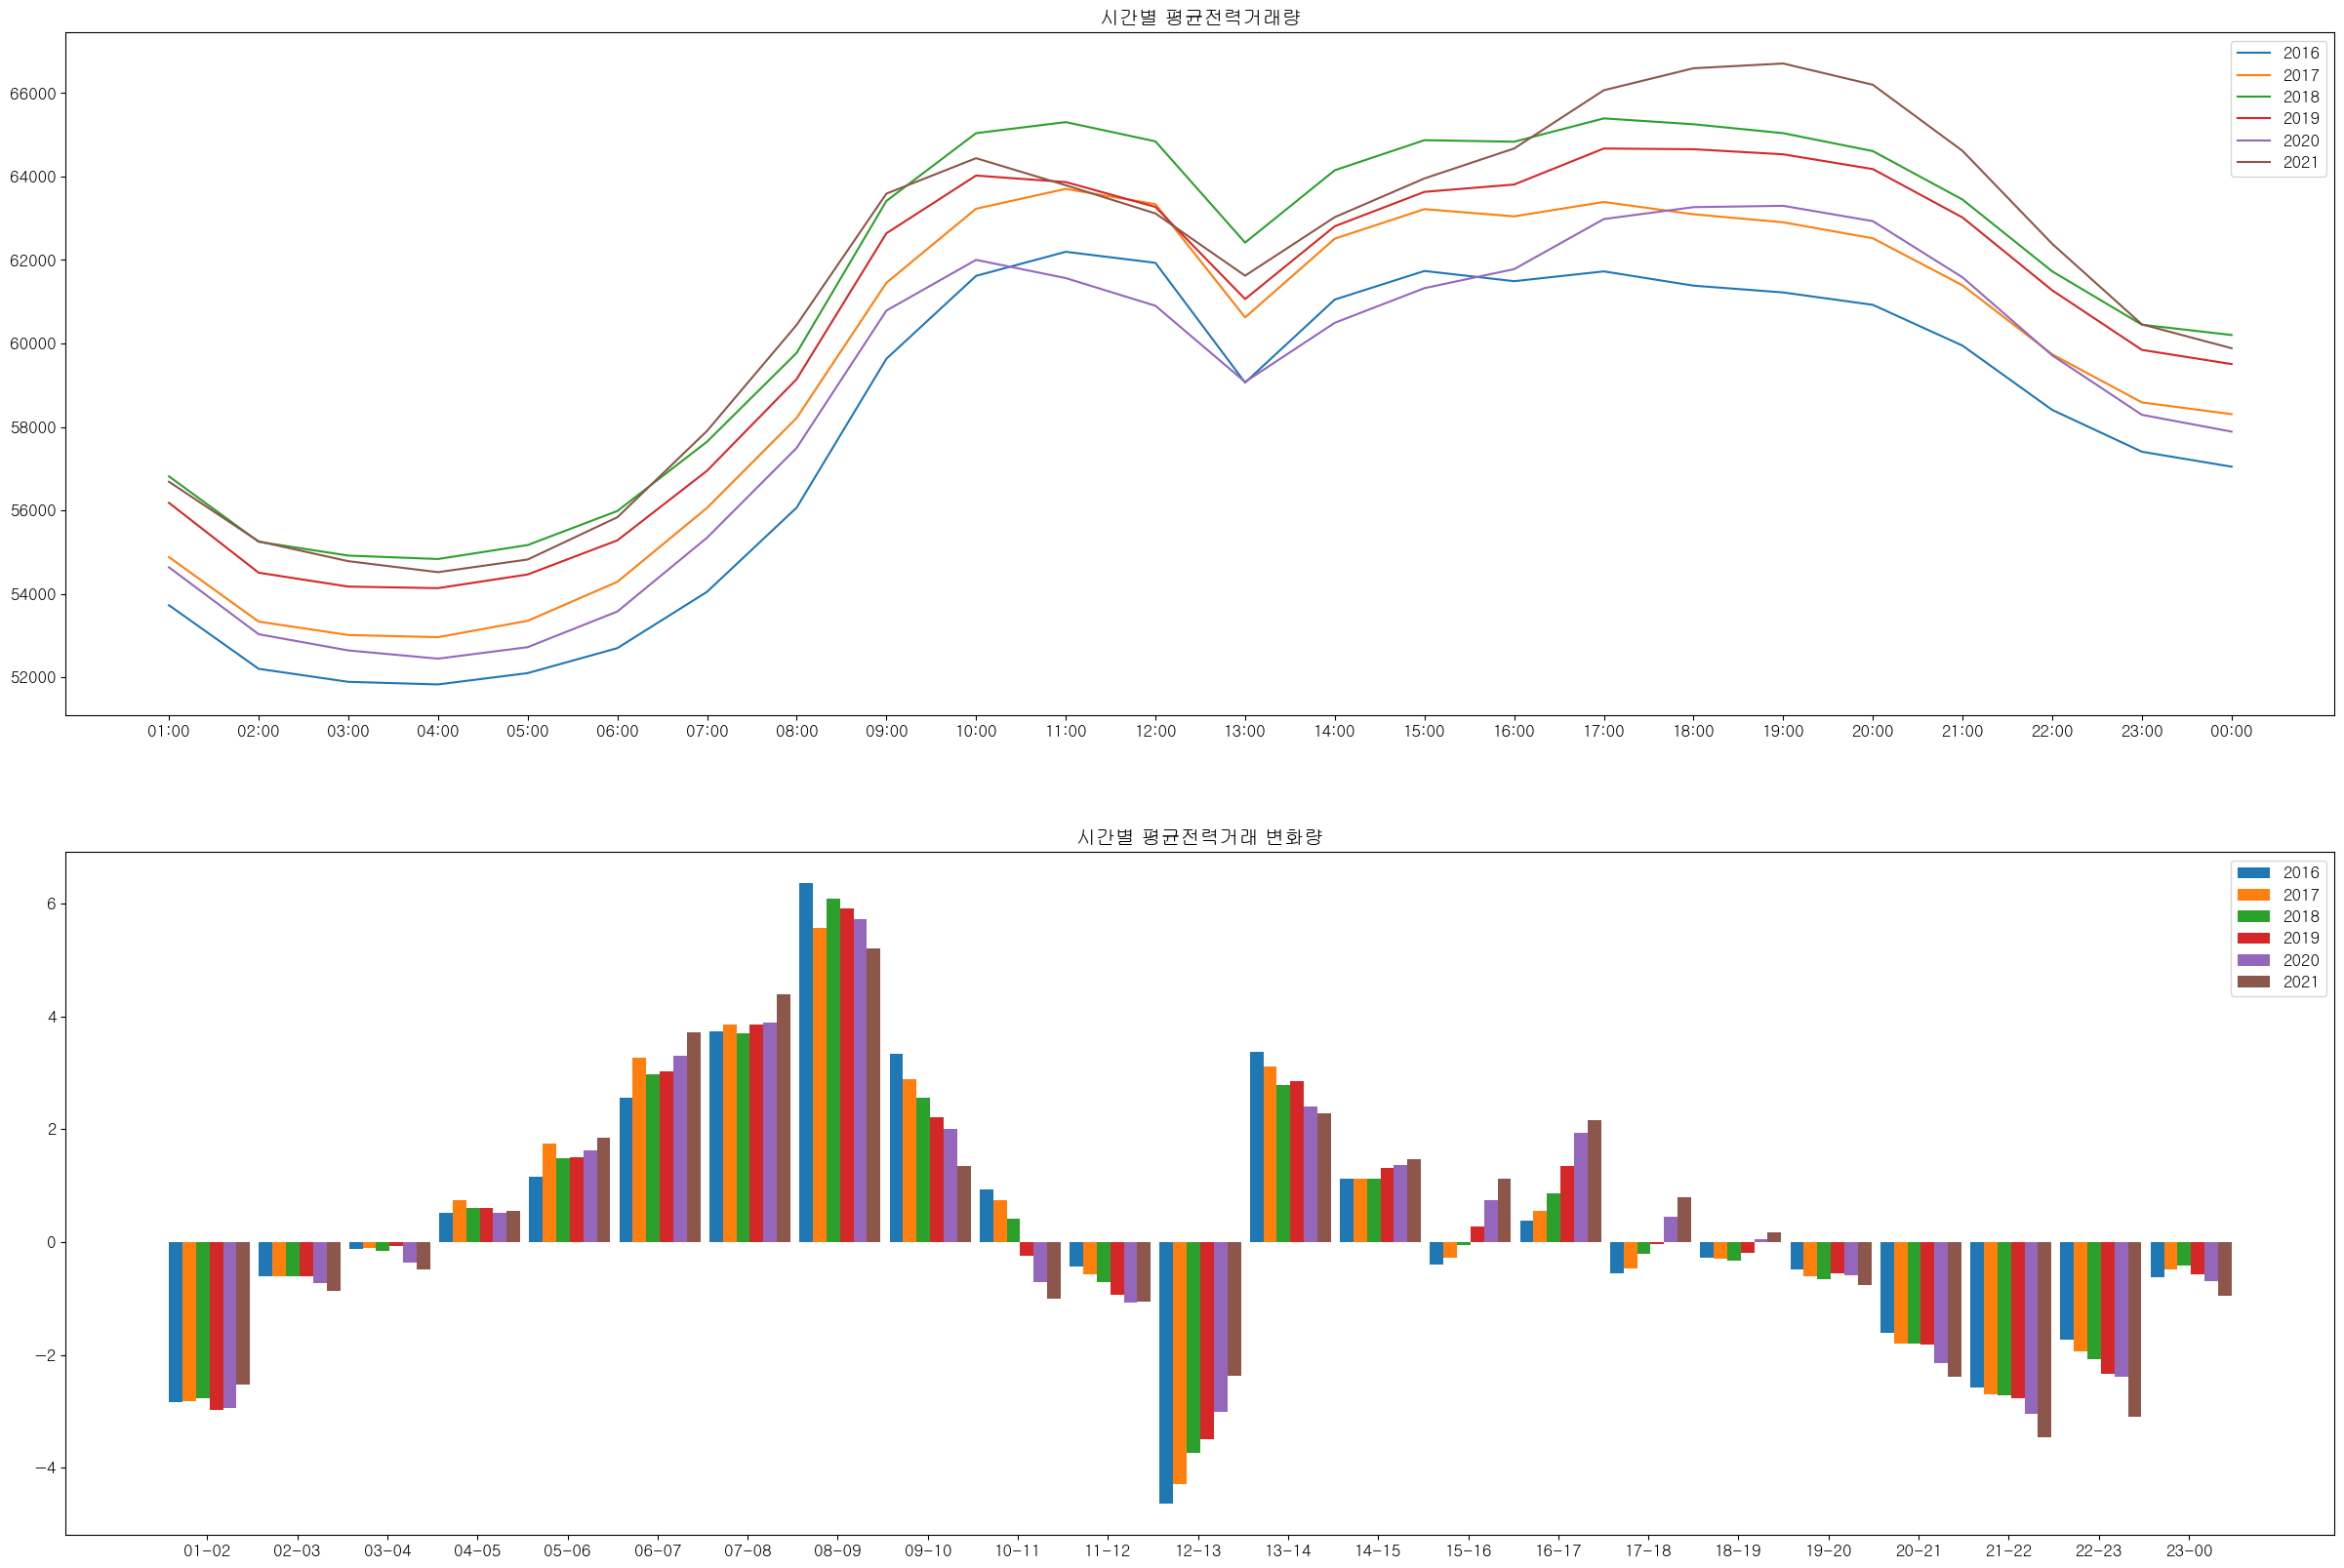

In [24]:
fig, ax = plt.subplots(2,1,figsize=(30,20))
for i in year:
    ax[0].plot(globals()['time'+i].시간,globals()['time'+i].평균전력거래량,label = i)
ax[0].legend()
ax[0].set_title('시간별 평균전력거래량')
ax[1].bar(time2016_change.index-0.3,time2016_change.변화량,width = 0.15,label = '2016')
ax[1].bar(time2017_change.index-0.15,time2017_change.변화량,width = 0.15,label = '2017')
ax[1].bar(time2018_change.index,time2018_change.변화량,width = 0.15,label = '2018')
ax[1].bar(time2019_change.index+0.15,time2019_change.변화량,width = 0.15,label = '2019')
ax[1].bar(time2020_change.index+0.3,time2020_change.변화량,width = 0.15,label = '2020')
ax[1].bar(time2021_change.index+0.45,time2021_change.변화량,width = 0.15,label = '2021')
ax[1].set_xticks(np.arange(0.05,time2016_change.shape[0],1),time2016_change['index'])
ax[1].set_title('시간별 평균전력거래 변화량')
ax[1].legend()

In [25]:
# 거리두기 전/후 (위드코로나, 거리두기 사실상 해제) 후의 전력판매량 변화

In [26]:
# 시각화를 위한 데이터 정제
year2 = ['2019','2020','2021','2022','2023']
for i in year2:
  for j,k in zip(cities,local_id):
    globals()[j+i] = pd.read_sql(("""
SELECT *
  FROM month
 WHERE 연도 = %s
   AND local_id = %s
""")%(i,k),conn)

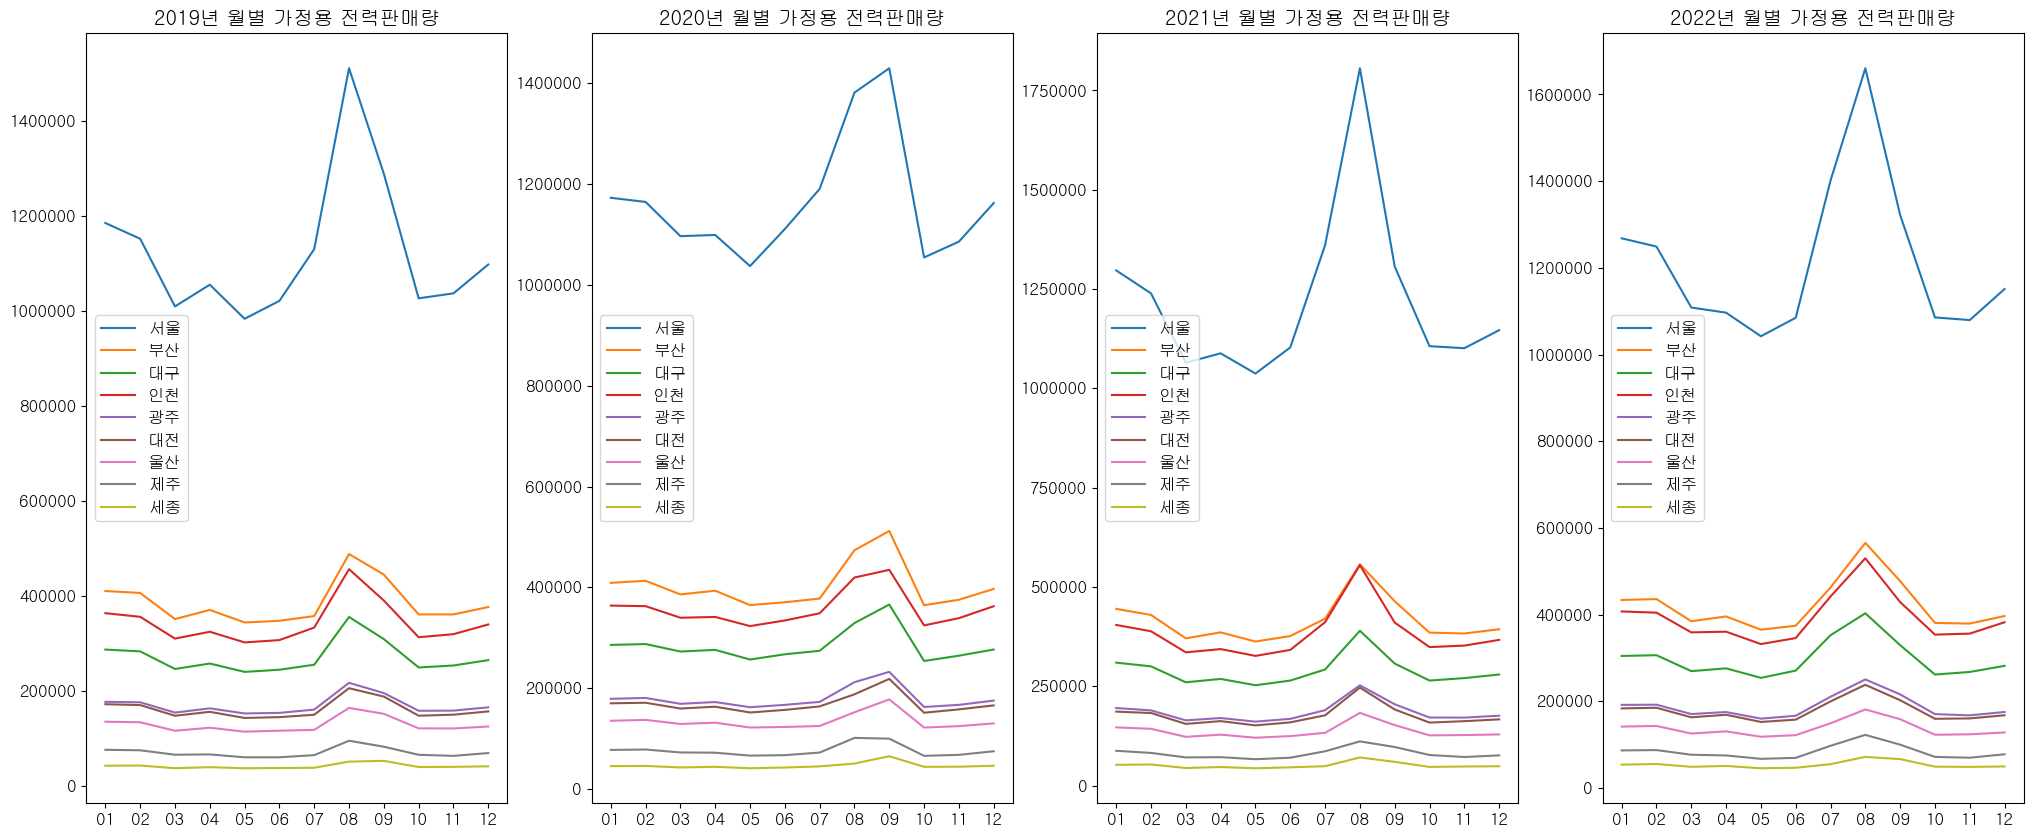

In [27]:
# 각 년도별 월별 가정용 전력판매량
fig, ax = plt.subplots(1,4,figsize = (25,10))
for i,j in zip(year2[:4],range(4)):
    ax[j].set_title(("%s년 월별 가정용 전력판매량")%i)
    for k,l in zip(cities,kor_cities):
        ax[j].plot(globals()[k+i].월,globals()[k+i].주거용,label = l)
        ax[j].get_yaxis().get_major_formatter().set_scientific(False)
        ax[j].legend(loc = 'center left')

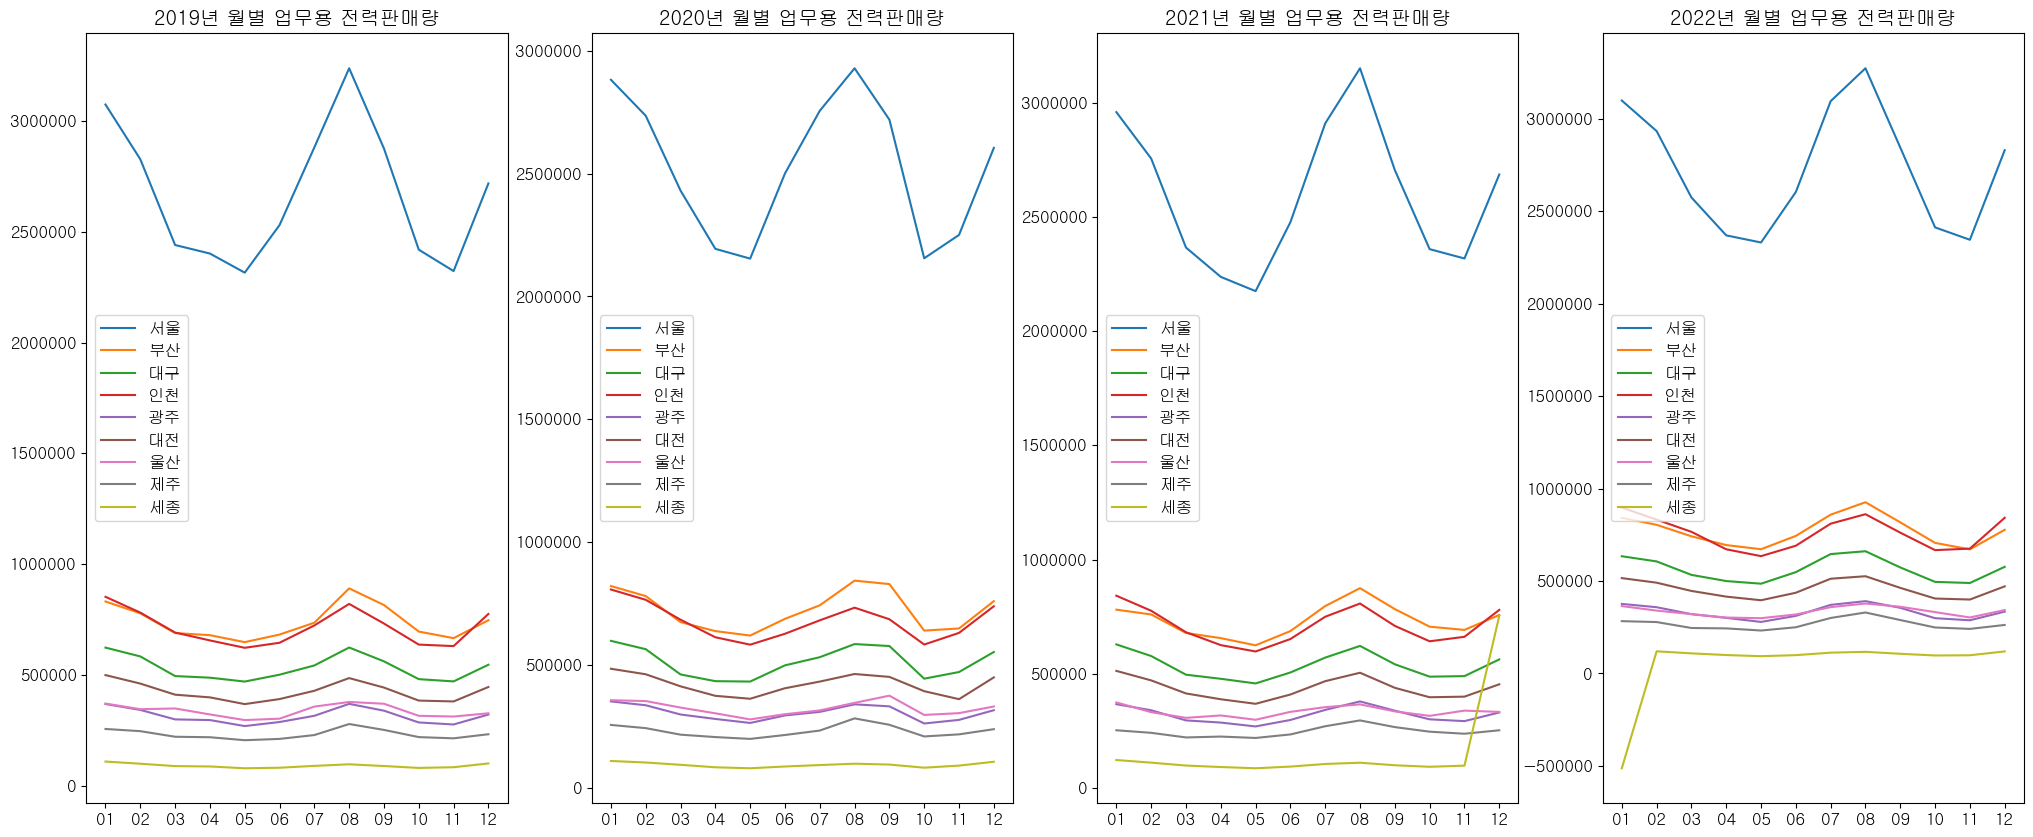

In [28]:
# 각 년도별 월별 업무용 전력판매량
fig, ax = plt.subplots(1,4,figsize = (25,10))
for i,j in zip(year2[:4],range(4)):
    ax[j].set_title(("%s년 월별 업무용 전력판매량")%i)
    for k,l in zip(cities,kor_cities):
        ax[j].plot(globals()[k+i].월,globals()[k+i].업무용,label = l)
        ax[j].get_yaxis().get_major_formatter().set_scientific(False)
        ax[j].legend(loc = 'center left')

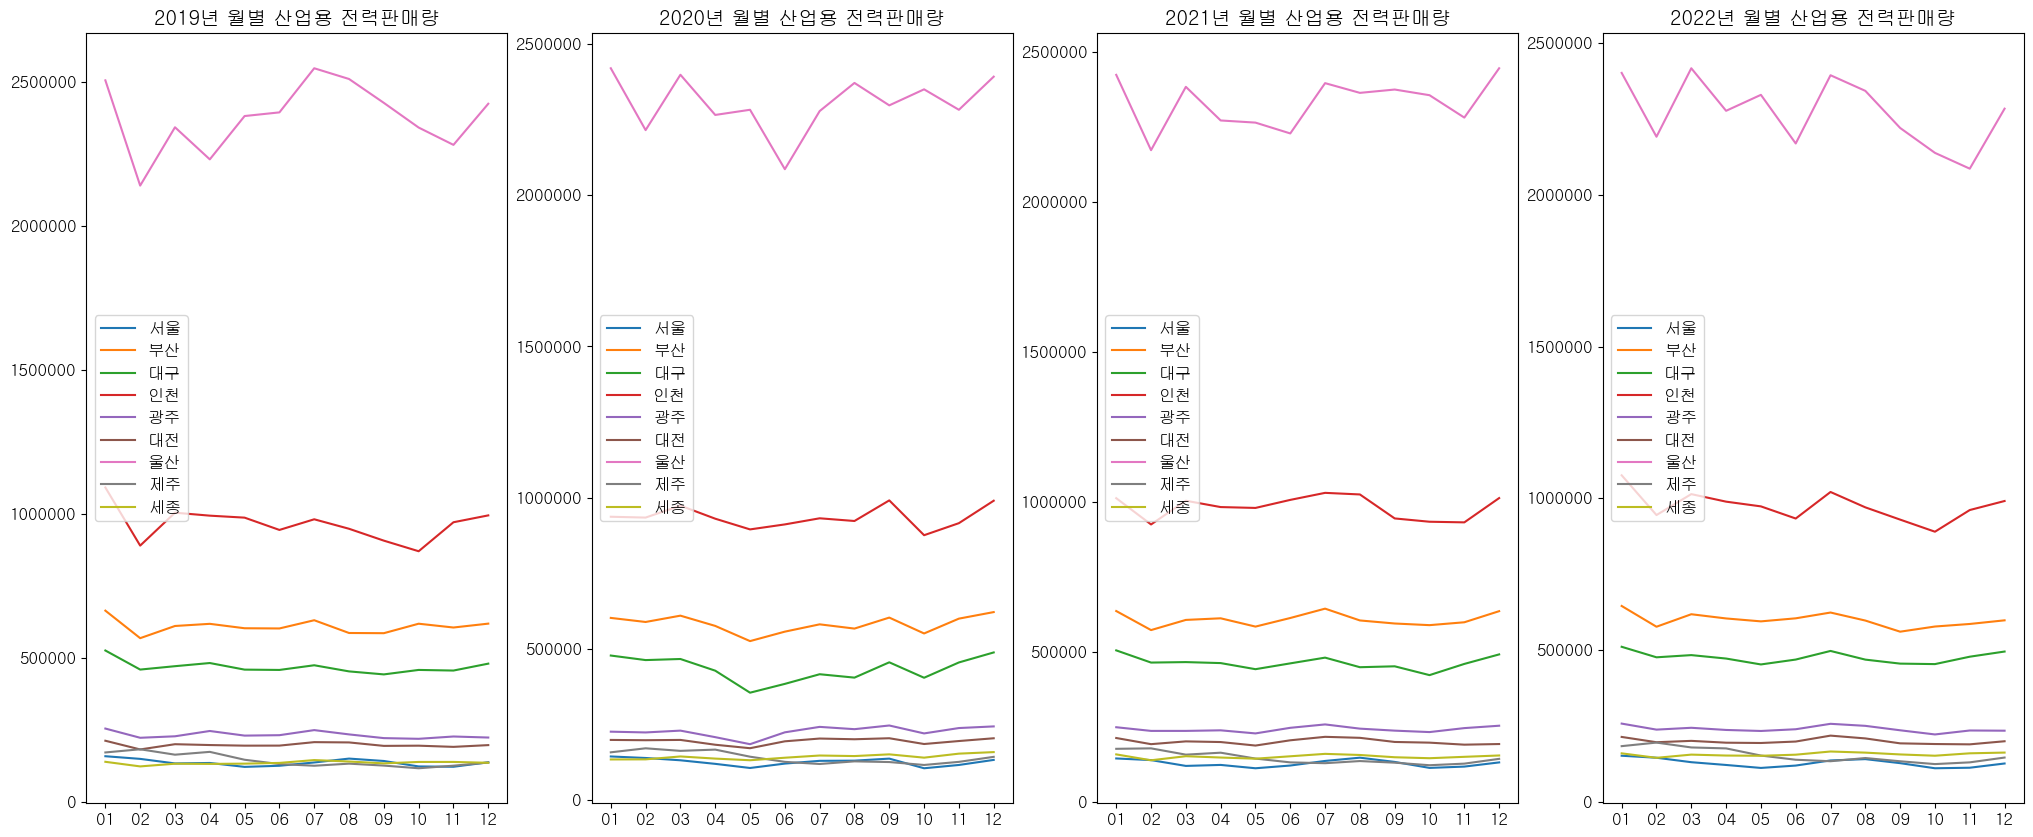

In [29]:
# 각 년도별 월별 산업용 전력판매량
fig, ax = plt.subplots(1,4,figsize = (25,10))
for i,j in zip(year2[:4],range(4)):
    ax[j].set_title(("%s년 월별 산업용 전력판매량")%i)
    for k,l in zip(cities,kor_cities):
        ax[j].plot(globals()[k+i].월,globals()[k+i].산업용,label = l)
        ax[j].get_yaxis().get_major_formatter().set_scientific(False)
        ax[j].legend(loc = 'center left')

In [30]:
# 상반기 / 하반기 판매전력량으로 이후의 전력판매량 예측

In [31]:
# 상반기 데이터 수집
for i in year2:
    globals()['fh'+i] = pd.read_sql(("""
SELECT *
  FROM month
 WHERE 연도 = %s
   AND 월 < 7
""")%i,conn)
    globals()['fh'+i] = globals()['fh'+i].groupby('월').sum().iloc[:,-3:]
# 하반기 데이터 수집    
for j in year2:
    globals()['sh'+j] = pd.read_sql(("""
SELECT *
  FROM month
 WHERE 연도 = %s
   AND 월 > 6
""")%j,conn)
    globals()['sh'+j] = globals()['sh'+j].groupby('월').sum().iloc[:,-3:]

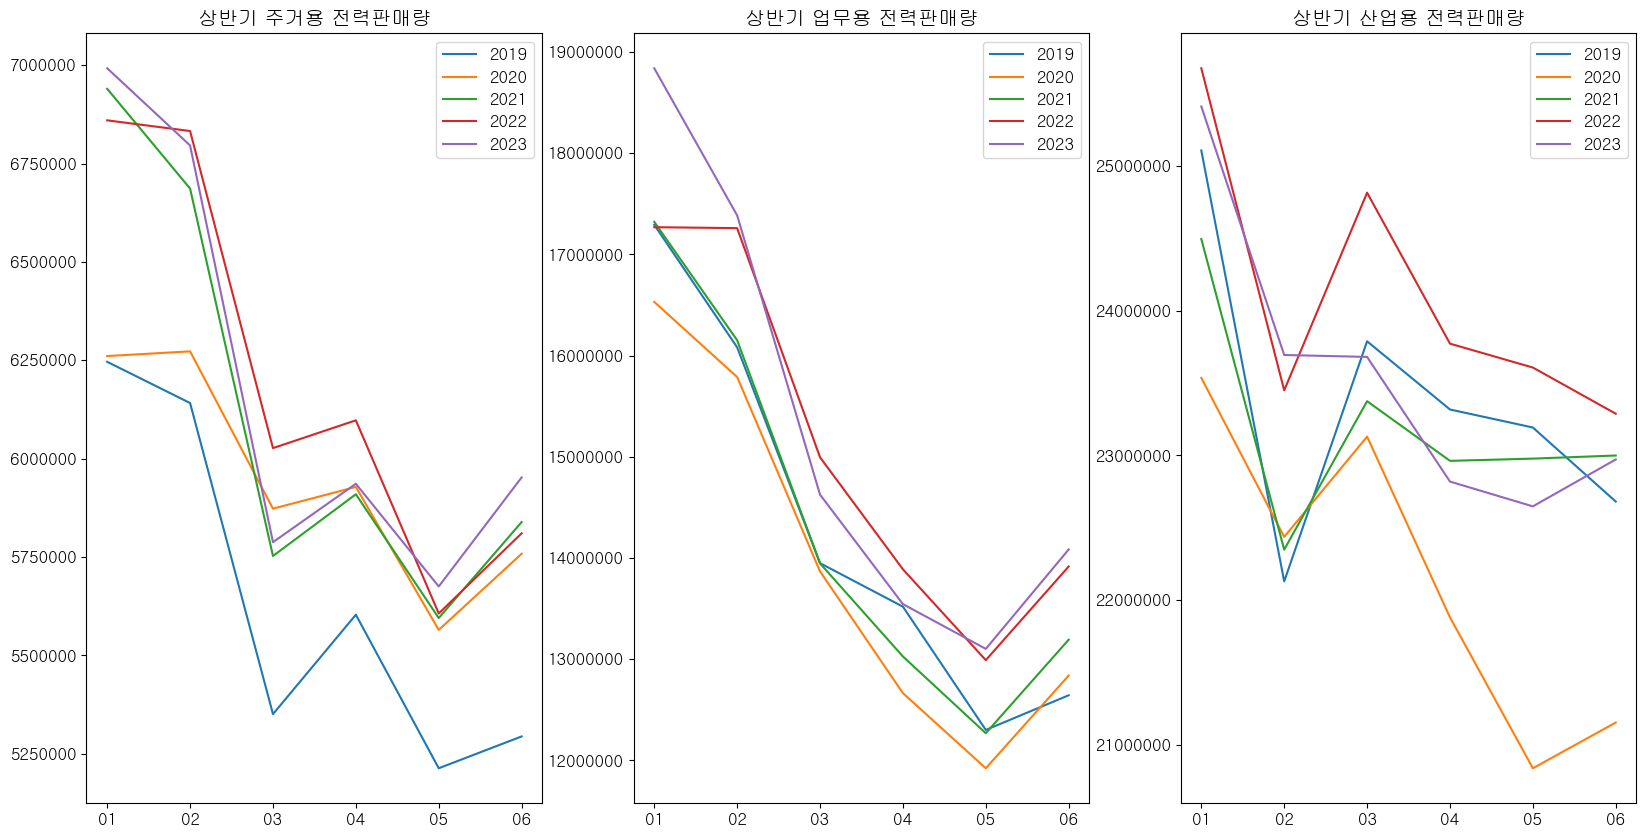

In [32]:
category = ['주거용','업무용','산업용']
fig, ax = plt.subplots(1,3,figsize=(20,10))
for i,j in zip(range(3),category):
    for k in year2:
        ax[i].plot(globals()['fh'+k].index,globals()['fh'+k][j],label = k)
        ax[i].get_yaxis().get_major_formatter().set_scientific(False)
        ax[i].set_title(('상반기 %s 전력판매량')%j)
        ax[i].legend()

NameError: name 'classific' is not defined

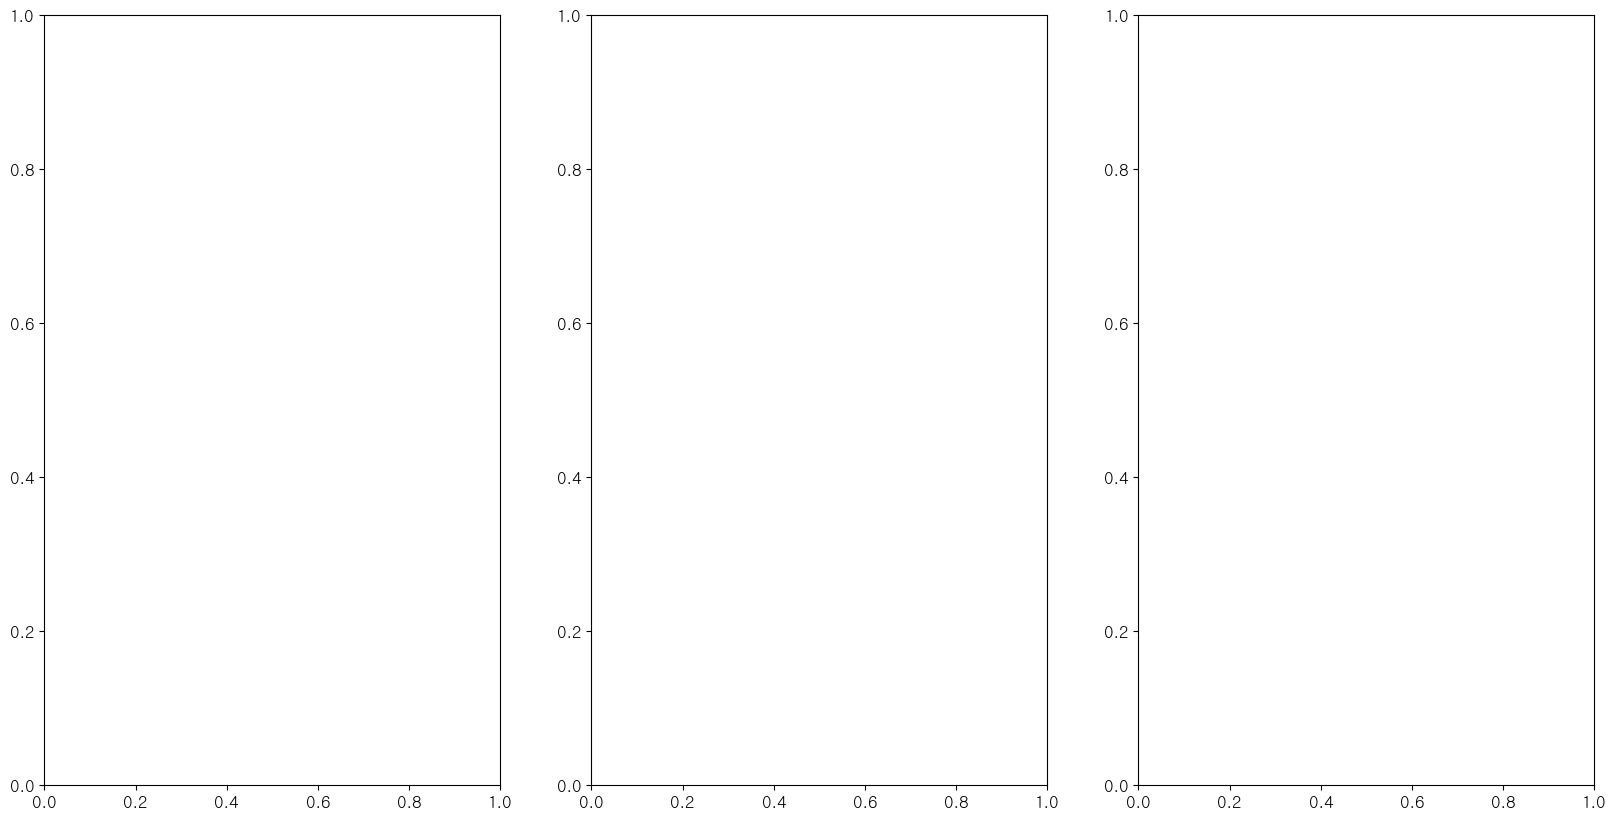

In [33]:
fig, ax = plt.subplots(1,3,figsize=(20,10))
for i,j in zip(range(3),classific):
    for k in year2[:4]:
        ax[i].plot(globals()['sh'+k].index,globals()['sh'+k][j],label = k)
        ax[i].get_yaxis().get_major_formatter().set_scientific(False)
        ax[i].set_title(('하반기 %s 전력판매량')%j)
        ax[i].legend()